In [1]:
from google.colab import files

# Upload file dialog
uploaded = files.upload()

# Unzip uploaded file (assuming only one file uploaded)
import zipfile
import io

for fn in uploaded.keys():
    print(f'Unzipping: {fn}')
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
        zip_ref.extractall()

Saving Deep-learning-project-main.zip to Deep-learning-project-main.zip
Unzipping: Deep-learning-project-main.zip


In [4]:
from google.colab import files

# Upload file dialog
uploaded = files.upload()

# Unzip uploaded file (assuming only one file uploaded)
import zipfile
import io

for fn in uploaded.keys():
    print(f'Unzipping: {fn}')
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
        zip_ref.extractall()

Saving Segmented_Reduced.zip to Segmented_Reduced.zip
Unzipping: Segmented_Reduced.zip


In [2]:
import os
import shutil
import glob
import random
from sklearn.model_selection import train_test_split

random.seed(42)

# Source folder for augmented farm images
src_farm = '/content/Deep-learning-project-main/augmented_farm_backgrounds'

# Destination directories for the farm experiment:
dest_farm_train = '/content/data_farm_train'
dest_farm_val   = '/content/data_farm_val'
dest_farm_test  = '/content/test_farm_backgrounds'  # This common test set will be used for both experiments

# Create folder structure for each destination
for dest in [dest_farm_train, dest_farm_val, dest_farm_test]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Iterate over each category folder in the farm data
categories = [cat for cat in os.listdir(src_farm) if os.path.isdir(os.path.join(src_farm, cat))]
print("Augmented Farm Categories:", categories)

for cat in categories:
    cat_path = os.path.join(src_farm, cat)
    # Get image files (adjust file extensions if needed)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    # Determine label based on folder name
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    # Split: 70% train, 15% validation, 15% test
    if images:
        train_imgs, temp_imgs = train_test_split(images, train_size=0.7, random_state=42)
        val_imgs, test_imgs   = train_test_split(temp_imgs, test_size=0.5, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_farm_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_farm_val, label))
        for img in test_imgs:
            shutil.copy(img, os.path.join(dest_farm_test, label))

print("Augmented Farm data splitting completed!")

Augmented Farm Categories: ['Cherry_(including_sour)___Powdery_mildew_25', 'Blueberry___healthy_25', 'Strawberry___Leaf_scorch_25', 'Tomato___Early_blight_25', 'Corn_(maize)___healthy_25', 'Potato___Late_blight_25', 'Apple___Black_rot_25', 'Corn_(maize)___Common_rust__25', 'Orange___Haunglongbing_(Citrus_greening)_25', 'Peach___healthy_25', 'Pepper,_bell___healthy_25', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus_25', 'Tomato___Leaf_Mold_25', 'Squash___Powdery_mildew_25', 'Apple___Cedar_apple_rust_25', 'Grape___Black_rot_25', 'Tomato___Spider_mites Two-spotted_spider_mite_25', 'Apple___healthy_25', 'Strawberry___healthy_25', 'Peach___Bacterial_spot_25', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_25', 'Soybean___healthy_25', 'Cherry_(including_sour)___healthy_25', 'Tomato___Bacterial_spot_25', 'Potato___healthy_25', 'Potato___Early_blight_25', 'Apple___Apple_scab_25', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot_25', 'Tomato___Late_blight_25', 'Grape___Esca_(Black_Measles)_25', 'Toma

In [3]:
# Source folder for augmented pixel data
src_pixel = '/content/Deep-learning-project-main/augmented_random_pixels'

# Destination directories for the pixel experiment:
dest_pixel_train = '/content/data_pixel_train'
dest_pixel_val   = '/content/data_pixel_val'

for dest in [dest_pixel_train, dest_pixel_val]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Get categories from the pixel data folder
categories_pixel = [cat for cat in os.listdir(src_pixel) if os.path.isdir(os.path.join(src_pixel, cat))]
print("Augmented Pixel Categories:", categories_pixel)

for cat in categories_pixel:
    cat_path = os.path.join(src_pixel, cat)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    if images:
        train_imgs, val_imgs = train_test_split(images, train_size=0.85, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_pixel_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_pixel_val, label))

print("Augmented Pixel data splitting completed!")

Augmented Pixel Categories: ['Cherry_(including_sour)___Powdery_mildew_25', 'Blueberry___healthy_25', 'Strawberry___Leaf_scorch_25', 'Tomato___Early_blight_25', 'Corn_(maize)___healthy_25', 'Potato___Late_blight_25', 'Apple___Black_rot_25', 'Corn_(maize)___Common_rust__25', 'Orange___Haunglongbing_(Citrus_greening)_25', 'Peach___healthy_25', 'Pepper,_bell___healthy_25', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus_25', 'Tomato___Leaf_Mold_25', 'Squash___Powdery_mildew_25', 'Apple___Cedar_apple_rust_25', 'Grape___Black_rot_25', 'Tomato___Spider_mites Two-spotted_spider_mite_25', 'Apple___healthy_25', 'Strawberry___healthy_25', 'Peach___Bacterial_spot_25', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_25', 'Soybean___healthy_25', 'Cherry_(including_sour)___healthy_25', 'Tomato___Bacterial_spot_25', 'Potato___healthy_25', 'Potato___Early_blight_25', 'Apple___Apple_scab_25', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot_25', 'Tomato___Late_blight_25', 'Grape___Esca_(Black_Measles)_25', 'Tom

In [5]:
# Source folder for black segmented data (after unzipping)
src_segmented = '/content/Segmented_Reduced'

# Destination directories for the segmented experiment
dest_segmented_train = '/content/data_segmented_train'
dest_segmented_val   = '/content/data_segmented_val'

# Create destination directories with healthy/unhealthy subfolders
for dest in [dest_segmented_train, dest_segmented_val]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Get categories from the segmented data folder
categories_segmented = [cat for cat in os.listdir(src_segmented)
                        if os.path.isdir(os.path.join(src_segmented, cat))]
print("Segmented Categories:", categories_segmented)

# Iterate over each category folder and split the images into train and validation sets
for cat in categories_segmented:
    cat_path = os.path.join(src_segmented, cat)
    # Find image files (adjust extensions as necessary)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    # Determine the label based on the folder name
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    if images:
        # Split 85% for training, 15% for validation
        train_imgs, val_imgs = train_test_split(images, train_size=0.85, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_segmented_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_segmented_val, label))

print("Segmented data splitting completed!")

Segmented Categories: ['Bell_Pepper_Bacterial_spot_Reduced', 'Apple__Cedar_rust_reduced', 'Corn__common_rust_reduced', 'Corn_northern_leaf_blight_reduced', 'Apple_healthy_reduced', 'Grape_Black_Rot_Reduced', 'Peach__Bacterial_spot_reduced', 'Tomato__Target_Spot_Reduced', 'Peach__healthy_reduced', 'Blueberry_healthy_reduced', 'Potato___Early_blight_reduced', 'Tomato__Tomato_Yellow_Leaf_Curl_Virus_Reduced', 'Grape_esca_reduced', 'Tomato__Early_Blight_Reduced', 'Corn_healthy_reduced', 'Potato__Late_blight_reduced', 'Grape_healthy_reduced', 'Potato__healthy_reduced', 'Tomato__Tomato_mosaic_virus_reduced', 'Tomato__Late_blight_reduced', 'Apple_scab_reduced', 'Raspberry__healthy_reduced', 'Soybean__healthy_reduced', 'Tomato__Lead_Mold_reduced', 'Bell__Pepper_healthy_reduced', 'Cherry_Powdery_mildew_reduced', 'Tomato__healthy_reduced', 'Tomato__Bacterial_spot_reduced', 'Grape__Leaf_blight_reduced', 'Tomato__Septoria_leaf_spot_reduced', 'Apple_black_rot_reduced', 'Strawberry__Leaf_scorch_reduc

Augmented Farm Training Set Samples:


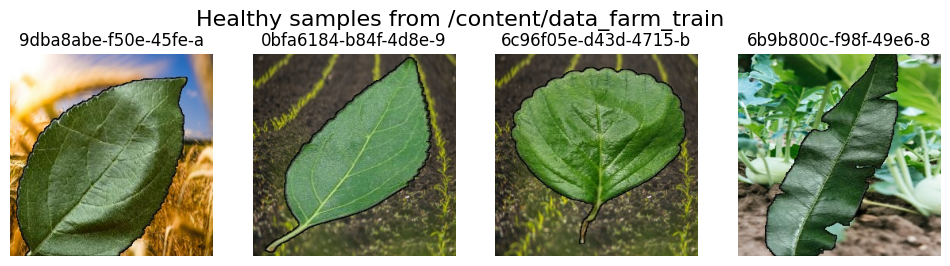

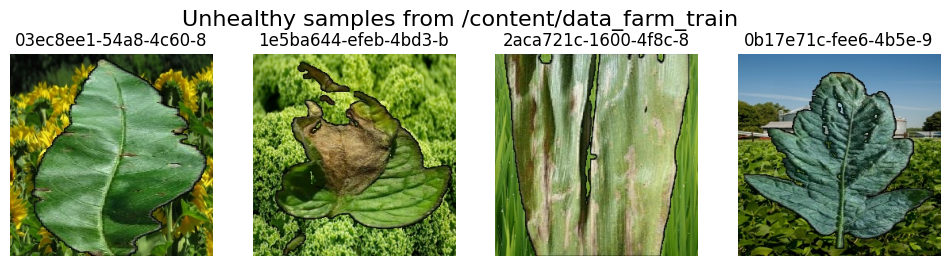

Augmented Pixel Training Set Samples:


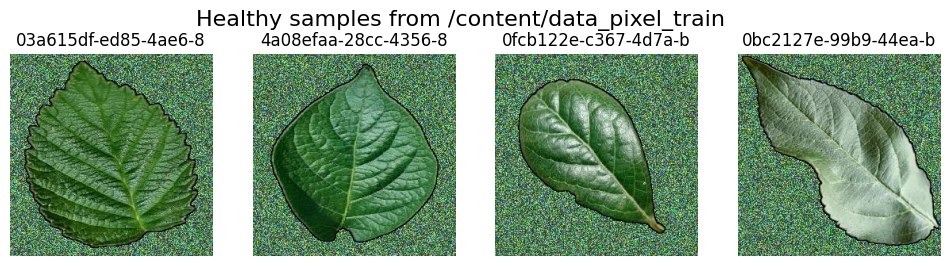

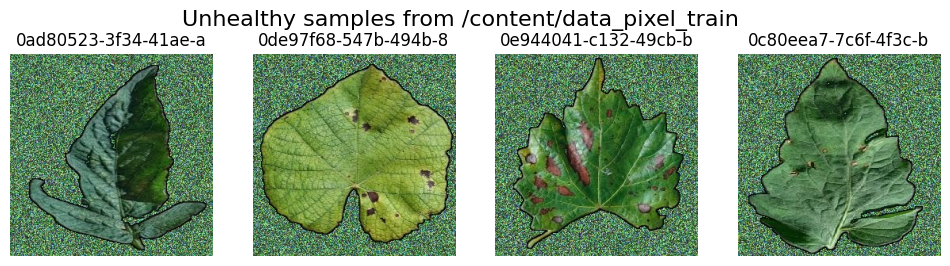

Segmented Training Set Samples:


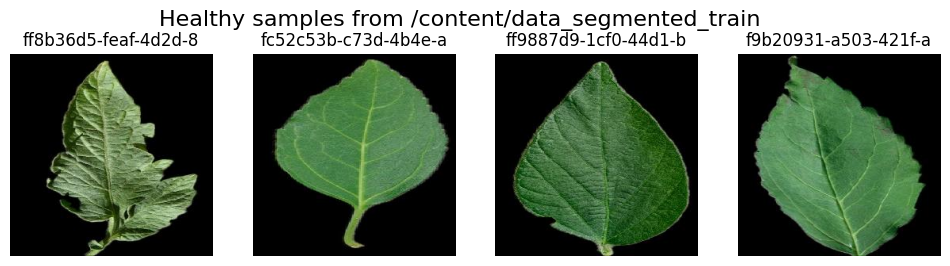

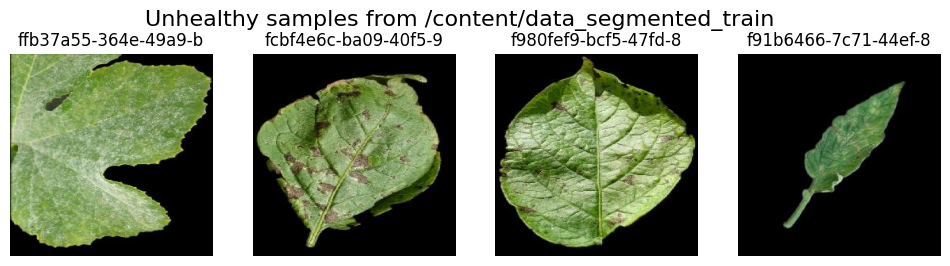

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_samples_from_category(base_dir, category, num_images=4):
    """
    Display a few sample images from a specified category folder.
    """
    cat_path = os.path.join(base_dir, category)
    # Get image filenames with common extensions
    image_files = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not image_files:
        print(f"No images found in {cat_path}")
        return
    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(12, 3))
    plt.suptitle(f"{category.capitalize()} samples from {base_dir}", fontsize=16)

    for i, file in enumerate(sample_files):
        img_path = os.path.join(cat_path, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, len(sample_files), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file[:20])
    plt.show()

def show_samples_from_dataset(dataset_dir, num_images=4):
    """
    Display sample images for both healthy and unhealthy categories
    from a dataset directory that contains subfolders for each category.
    """
    for category in ['healthy', 'unhealthy']:
        show_samples_from_category(dataset_dir, category, num_images=num_images)

# Make sure these directory variables have been defined from your data splitting steps:
# dest_farm_train, dest_pixel_train, dest_segmented_train

print("Augmented Farm Training Set Samples:")
show_samples_from_dataset(dest_farm_train)

print("Augmented Pixel Training Set Samples:")
show_samples_from_dataset(dest_pixel_train)

print("Segmented Training Set Samples:")
show_samples_from_dataset(dest_segmented_train)

In [6]:
import tensorflow as tf

batch_size = 32
img_size = (224, 224)

# --- For the Augmented Farm Experiment ---
train_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Augmented Pixel Experiment ---
train_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Segmented Experiment ---
train_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- Common Test Set (from Augmented Farm Data) ---
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_test,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# Cache and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
def prepare_ds(ds):
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds_farm    = prepare_ds(train_ds_farm)
val_ds_farm      = prepare_ds(val_ds_farm)
train_ds_pixel   = prepare_ds(train_ds_pixel)
val_ds_pixel     = prepare_ds(val_ds_pixel)
train_ds_segmented = prepare_ds(train_ds_segmented)
val_ds_segmented = prepare_ds(val_ds_segmented)
test_ds          = prepare_ds(test_ds)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def create_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification: healthy vs unhealthy
    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three identical models for the experiments
model_farm = create_model()
model_pixel = create_model()
model_segmented = create_model()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Found 647 files belonging to 2 classes.
Found 152 files belonging to 2 classes.
Found 1026 files belonging to 2 classes.
Found 190 files belonging to 2 classes.
Found 798 files belonging to 2 classes.
Found 152 files belonging to 2 classes.
Found 152 files belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
epochs = 10

print("Training model on Augmented Farm Data:")
history_farm = model_farm.fit(train_ds_farm, validation_data=val_ds_farm, epochs=epochs)

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))


Training model on Augmented Farm Data:
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 961ms/step - accuracy: 0.6003 - loss: 0.7188 - val_accuracy: 0.7697 - val_loss: 0.4749
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7914 - loss: 0.4463 - val_accuracy: 0.8224 - val_loss: 0.4266
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8406 - loss: 0.3763 - val_accuracy: 0.8224 - val_loss: 0.4072
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8364 - loss: 0.3495 - val_accuracy: 0.8355 - val_loss: 0.3931
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8331 - loss: 0.3229 - val_accuracy: 0.8421 - val_loss: 0.3842
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8675 - loss: 0.2952 - val_accuracy: 0.8421 - val_loss: 0.3798
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8930 - loss: 0.2718 - val_accuracy: 0.8421 - val_loss: 0.3722
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9060 

In [9]:
print("Training model on Augmented Pixel Data:")
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs)

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Training model on Augmented Pixel Data:
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 501ms/step - accuracy: 0.6958 - loss: 0.6032 - val_accuracy: 0.9000 - val_loss: 0.3174
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8413 - loss: 0.3234 - val_accuracy: 0.9053 - val_loss: 0.2993
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8698 - loss: 0.2865 - val_accuracy: 0.9158 - val_loss: 0.2761
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8841 - loss: 0.2651 - val_accuracy: 0.9105 - val_loss: 0.2674
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8847 - loss: 0.2459 - val_accuracy: 0.9105 - val_loss: 0.2612
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9039 - loss: 0.2302 - val_accuracy: 0.9053 - val_loss: 0.2556
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9068 - loss: 0.2171 - val_accuracy: 0.9211 - val_loss: 0.2548
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9103

In [10]:
print("Training model on Segmented Data:")
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs)


print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Training model on Segmented Data:
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 321ms/step - accuracy: 0.7656 - loss: 0.5019 - val_accuracy: 0.8421 - val_loss: 0.3824
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8270 - loss: 0.3639 - val_accuracy: 0.8355 - val_loss: 0.3892
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8681 - loss: 0.2966 - val_accuracy: 0.8750 - val_loss: 0.2994
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9111 - loss: 0.2292 - val_accuracy: 0.9079 - val_loss: 0.2856
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9330 - loss: 0.1893 - val_accuracy: 0.9013 - val_loss: 0.2706
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9457 - loss: 0.1621 - val_accuracy: 0.9211 - val_loss: 0.2501
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9660 - loss: 0.1364 - val_accuracy: 0.9079 - val_loss: 0.2445
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9757 - los